Student Details

Name: Fergus Mc Hale

ID: 18203485

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd

In [2]:
TARGET_ATTRIBUTE = '2'

In [3]:
def svm_compare(X,y) : 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    kernels = ['linear', 'sigmoid','rbf', 'poly']
    
    for k in kernels:
            standard_svm = svm.SVC(kernel=k)
            standard_svm.fit(X_train,y_train)
            standard_score = standard_svm.score(X_test,y_test)
            standard_score = f'{standard_svm.score(X_test,y_test):.2f}'
            print("Kernel :\t",k,"Score : \t",standard_score)

In [4]:
# Setup Variables

C_values = [0.001, 0.01, 0.1, 1, 10]

kernel_vals = ['rbf', 'sigmoid', 'linear']

gamma_vals = [0.001, 0.01, 0.1, 1, 'scale']

degree_vals = [2, 3, 4 ]

coef0_vals = [0.0, 1.0]

# Dataset 1

In [5]:
dataset_1 = pd.read_csv("./dataset_1.csv",index_col=0)

In [6]:
y1 = dataset_1[TARGET_ATTRIBUTE].values

X1 = dataset_1.drop(TARGET_ATTRIBUTE, axis=1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

# Dataset 2

In [7]:
dataset_2 = pd.read_csv("./dataset_2.csv",index_col=0)

In [8]:
y2 = dataset_2[TARGET_ATTRIBUTE].values

# predictor attributes
X2 = dataset_2.drop(TARGET_ATTRIBUTE, axis=1).values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

# DataSet 3

In [9]:
dataset_3 = pd.read_csv("./dataset_3.csv",index_col=0)

In [10]:
y3 = dataset_3[TARGET_ATTRIBUTE].values

# predictor attributes
X3 = dataset_3.drop(TARGET_ATTRIBUTE, axis=1).values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [11]:
nb_sv=[]
classifiers = []
for c_index in range(len(C_values)):
    svc = svm.SVC(kernel='linear', C=C_values[c_index])
    svc.fit(X1_train, y1_train)
    nb_sv.append(len(svc.support_vectors_))
    classifiers.append(svc)

In [12]:
def get_eout(support_vector_size,number_of_training_samples):
    return support_vector_size/(number_of_training_samples -1)

In [13]:
def plot_classifier(clf, X_train,y_train,title=None):
    # plot the decision function
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.title(title)
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,  linewidth=1, facecolors='none', edgecolors='k')        
    print('Total Support Vectors {0}'.format(len(clf.support_vectors_)))
    print('Training Samples {0}'.format(len(X_train)))
    print(clf.support_vectors_)
    expected_eout = get_eout(len(clf.support_vectors_),len(X_train))
    print('E-out {0}'.format(expected_eout))
    
    if(clf.kernel=='linear'):
        # Calculate width of margin
        margin = 1 / np.sqrt(np.sum(clf.coef_** 2))
        margin_string = f'{margin:.2f}'
        plt.title('SVM with C = ' + str(clf.C) + ", kernel = " + clf.kernel + " and margin = " + margin_string)
    else:
        plt.title('SVM with C = ' + str(clf.C) + " and kernel = " + clf.kernel)
        
    plt.show()

# Task 4  (CE6002)
* Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin.
* This task provides an insight in how SVM’s try to find a hyperplane (which in two dimensions is a line) which divides two classes with the maximum margin on either side of the hyperplane. You can use the C-parameter as a form of regularization; with this parameter you can allow the SVM to miss-classify certain points to allow a wider margin and thus, hopefully, a better performance out-of-sample.

Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM. Numerical data with explanation to support the conclusions drawn from the graphs.

In [14]:
svm_compare(X1,y1)

Kernel :	 linear Score : 	 1.00
Kernel :	 sigmoid Score : 	 1.00
Kernel :	 rbf Score : 	 1.00
Kernel :	 poly Score : 	 0.99


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Total Support Vectors 4006
Training Samples 8000
[[-0.50358877  0.96632819]
 [-0.87265502 -0.09016619]
 [-0.94552441 -0.24268308]
 ...
 [-0.11503384 -0.88008516]
 [ 0.37327165  0.37501081]
 [ 0.50878485  0.81227787]]
E-out 0.5008126015751969


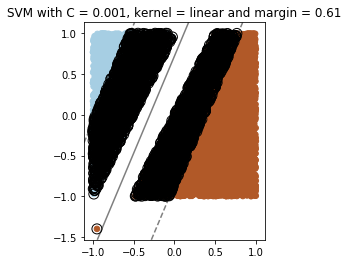

Total Support Vectors 1136
Training Samples 8000
[[-0.1229641   0.8267955 ]
 [-0.59825934 -0.13000742]
 [-0.43597199  0.14867813]
 ...
 [-0.02212102 -0.21199895]
 [-0.12264757 -0.25123702]
 [ 0.01144475 -0.1722105 ]]
E-out 0.14201775221902738


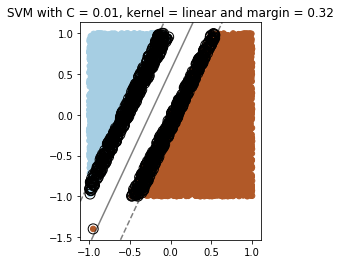

Total Support Vectors 182
Training Samples 8000
[[-0.43597199  0.14867813]
 [-0.57017831 -0.12847044]
 [-0.5335055  -0.04491246]
 [-0.52501775 -0.03622958]
 [-0.20608335  0.62901802]
 [-0.31810669  0.38698206]
 [-0.36461895  0.29212658]
 [-0.98792723 -0.97230995]
 [-0.57487064 -0.14323181]
 [-0.46830283  0.08072509]
 [-0.40319348  0.21483229]
 [-0.41876949  0.16350114]
 [-0.27611848  0.45161241]
 [-0.26191636  0.47782806]
 [-0.1895113   0.6587245 ]
 [-0.49699073  0.03050118]
 [-0.18799916  0.66124973]
 [-0.26903502  0.49715243]
 [-0.05816835  0.93247212]
 [-0.78049099 -0.53356057]
 [-0.56925863 -0.13273605]
 [-0.71806063 -0.42772625]
 [-0.49326362  0.02880475]
 [-0.93348183 -0.86618848]
 [-0.24064623  0.5620407 ]
 [-0.57379169 -0.12867316]
 [-0.9039289  -0.78579093]
 [-0.83928299 -0.67750844]
 [-0.8057124  -0.60458818]
 [-0.86301641 -0.71396085]
 [-0.94427626 -0.87298394]
 [-0.84077842 -0.66243903]
 [-0.71501272 -0.41322278]
 [-0.51621127 -0.00142536]
 [-0.679925   -0.33355224]
 [-0.65

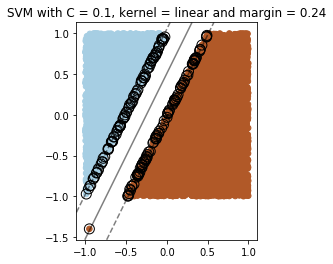

Total Support Vectors 23
Training Samples 8000
[[-0.98792723 -0.97230995]
 [-0.41876949  0.16350114]
 [-0.27611848  0.45161241]
 [-0.26191636  0.47782806]
 [-0.93348183 -0.86618848]
 [-0.83928299 -0.67750844]
 [-0.27486548  0.45362456]
 [-0.62230156 -0.24152621]
 [-0.02413072  0.95493771]
 [-0.13321589  0.73438384]
 [-0.11395808  0.77610907]
 [-0.13394844 -0.2682658 ]
 [ 0.16721063  0.33260922]
 [ 0.34586609  0.6888361 ]
 [-0.95       -1.4       ]
 [ 0.33605953  0.67044617]
 [ 0.01232266  0.02172611]
 [ 0.26596053  0.53110191]
 [-0.32531538 -0.65420706]
 [-0.28379043 -0.5705029 ]
 [ 0.31305328  0.62450954]
 [-0.30492905 -0.61379245]
 [ 0.01339543  0.02530265]]
E-out 0.002875359419927491


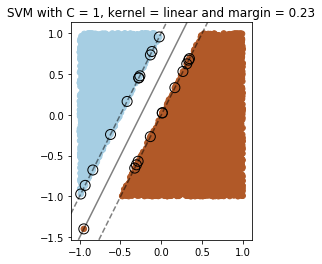

Total Support Vectors 6
Training Samples 8000
[[-0.93348183 -0.86618848]
 [-0.83928299 -0.67750844]
 [-0.13321589  0.73438384]
 [-0.13394844 -0.2682658 ]
 [-0.95       -1.4       ]
 [ 0.26596053  0.53110191]]
E-out 0.0007500937617202151


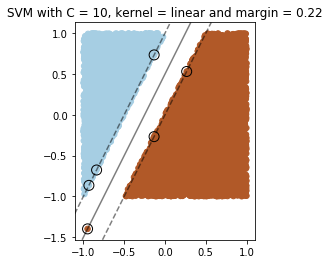

In [15]:
for classifier in classifiers:
    plot_classifier(classifier, X1_train, y1_train,classifier)

Total Support Vectors 4006
Training Samples 2001
[[-0.50358877  0.96632819]
 [-0.87265502 -0.09016619]
 [-0.94552441 -0.24268308]
 ...
 [-0.11503384 -0.88008516]
 [ 0.37327165  0.37501081]
 [ 0.50878485  0.81227787]]
E-out 2.003


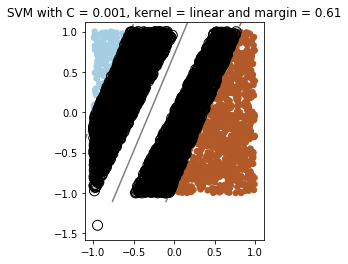

Total Support Vectors 1136
Training Samples 2001
[[-0.1229641   0.8267955 ]
 [-0.59825934 -0.13000742]
 [-0.43597199  0.14867813]
 ...
 [-0.02212102 -0.21199895]
 [-0.12264757 -0.25123702]
 [ 0.01144475 -0.1722105 ]]
E-out 0.568


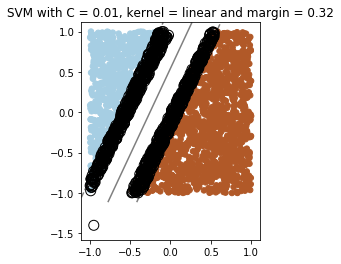

Total Support Vectors 182
Training Samples 2001
[[-0.43597199  0.14867813]
 [-0.57017831 -0.12847044]
 [-0.5335055  -0.04491246]
 [-0.52501775 -0.03622958]
 [-0.20608335  0.62901802]
 [-0.31810669  0.38698206]
 [-0.36461895  0.29212658]
 [-0.98792723 -0.97230995]
 [-0.57487064 -0.14323181]
 [-0.46830283  0.08072509]
 [-0.40319348  0.21483229]
 [-0.41876949  0.16350114]
 [-0.27611848  0.45161241]
 [-0.26191636  0.47782806]
 [-0.1895113   0.6587245 ]
 [-0.49699073  0.03050118]
 [-0.18799916  0.66124973]
 [-0.26903502  0.49715243]
 [-0.05816835  0.93247212]
 [-0.78049099 -0.53356057]
 [-0.56925863 -0.13273605]
 [-0.71806063 -0.42772625]
 [-0.49326362  0.02880475]
 [-0.93348183 -0.86618848]
 [-0.24064623  0.5620407 ]
 [-0.57379169 -0.12867316]
 [-0.9039289  -0.78579093]
 [-0.83928299 -0.67750844]
 [-0.8057124  -0.60458818]
 [-0.86301641 -0.71396085]
 [-0.94427626 -0.87298394]
 [-0.84077842 -0.66243903]
 [-0.71501272 -0.41322278]
 [-0.51621127 -0.00142536]
 [-0.679925   -0.33355224]
 [-0.65

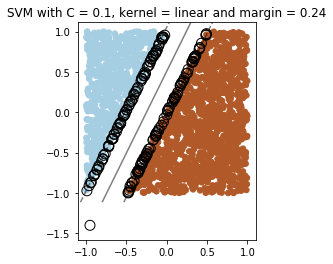

Total Support Vectors 23
Training Samples 2001
[[-0.98792723 -0.97230995]
 [-0.41876949  0.16350114]
 [-0.27611848  0.45161241]
 [-0.26191636  0.47782806]
 [-0.93348183 -0.86618848]
 [-0.83928299 -0.67750844]
 [-0.27486548  0.45362456]
 [-0.62230156 -0.24152621]
 [-0.02413072  0.95493771]
 [-0.13321589  0.73438384]
 [-0.11395808  0.77610907]
 [-0.13394844 -0.2682658 ]
 [ 0.16721063  0.33260922]
 [ 0.34586609  0.6888361 ]
 [-0.95       -1.4       ]
 [ 0.33605953  0.67044617]
 [ 0.01232266  0.02172611]
 [ 0.26596053  0.53110191]
 [-0.32531538 -0.65420706]
 [-0.28379043 -0.5705029 ]
 [ 0.31305328  0.62450954]
 [-0.30492905 -0.61379245]
 [ 0.01339543  0.02530265]]
E-out 0.0115


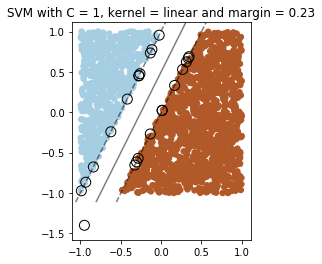

Total Support Vectors 6
Training Samples 2001
[[-0.93348183 -0.86618848]
 [-0.83928299 -0.67750844]
 [-0.13321589  0.73438384]
 [-0.13394844 -0.2682658 ]
 [-0.95       -1.4       ]
 [ 0.26596053  0.53110191]]
E-out 0.003


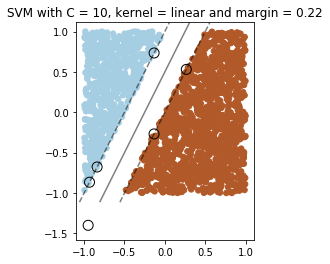

In [16]:
for classifier in classifiers:
    plot_classifier(classifier, X1_test, y1_test,classifier)

# Soft Margin

In [17]:
classifer_soft_margin = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [1]}, scoring='accuracy',cv=5, n_jobs=-1)
classifer_soft_margin.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear'], 'C': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Total Support Vectors 23
Training Samples 8000
[[-0.98792723 -0.97230995]
 [-0.41876949  0.16350114]
 [-0.27611848  0.45161241]
 [-0.26191636  0.47782806]
 [-0.93348183 -0.86618848]
 [-0.83928299 -0.67750844]
 [-0.27486548  0.45362456]
 [-0.62230156 -0.24152621]
 [-0.02413072  0.95493771]
 [-0.13321589  0.73438384]
 [-0.11395808  0.77610907]
 [-0.13394844 -0.2682658 ]
 [ 0.16721063  0.33260922]
 [ 0.34586609  0.6888361 ]
 [-0.95       -1.4       ]
 [ 0.33605953  0.67044617]
 [ 0.01232266  0.02172611]
 [ 0.26596053  0.53110191]
 [-0.32531538 -0.65420706]
 [-0.28379043 -0.5705029 ]
 [ 0.31305328  0.62450954]
 [-0.30492905 -0.61379245]
 [ 0.01339543  0.02530265]]
E-out 0.002875359419927491


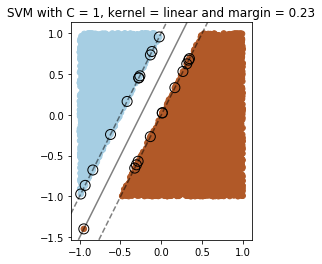

In [18]:
plot_classifier(classifer_soft_margin.best_estimator_, X1_train, y1_train,classifer_soft_margin)

# Hard Margin

In [19]:
classifer_hard_margin = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [30]}, scoring='accuracy',cv=5, n_jobs=-1)
classifer_hard_margin.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear'], 'C': [30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Total Support Vectors 3
Training Samples 8000
[[-0.98792723 -0.97230995]
 [ 0.49142383  0.97375185]
 [-0.95       -1.4       ]]
E-out 0.00037504688086010754


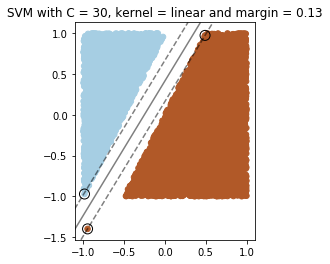

In [20]:
plot_classifier(classifer_hard_margin.best_estimator_, X1_train, y1_train,classifer_hard_margin)

# Task 4 Comment

* The diagrams above show that when C is large we are willing to accept violations to be as small as possible with the trade off being a small margin (higher complexity)
* In comparison when C is small we will tolerate some amounts of errors which will lead to a less complicated hypotheses with a large margin.
* It also highlights that out of sample error can be small even if the dimension d is large.
  The bound itself dosent explicity depend on the dimension.
* The margin is also inverse to the weight norm

# Task 5  (CE6002)
* Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.
* This task provides an insight in how a kernel can allow the SVM (a linear classifier) to be used on non-linearly separable data sets by casting the data in some higher dimensional space as determined by the kernel you choose. In addition to choosing a suitable kernel, you will find that tuning the hyper-parameters of the SVM is important. Take some time to explore various kernels and values of the hyper-parameters to get a feel for how they affect performance and then use a structured approach to arrive at your final conclusions. Take into consideration the out-of-sample error (simulated and based on theory (see lecture 14 from Learning from Data)). 
* For this task you may import two extra libraries: one to create train-test splits and one to perform a grid search of your choosing.

Suitable kernels and hyper parameters  proposed for all datasets. Proper use of train and test data and plots of the SVM hyperplane. Evidence of a structured approach to the selection of hyper-parameters.

In [21]:
def grid_search_CV_optimal_svm(X_train,y_train, params):
    clf = GridSearchCV(svm.SVC(), params, scoring='accuracy', cv=10, n_jobs=-1)
    clf.fit(X_train, y_train)
    print("Grid Search : Best SVM classifier parameters:\n", clf.best_params_)
    print("Grid Search :Best CV score :", clf.best_score_)
    return clf    

# Dataset 1

(8000, 2) (8000,)


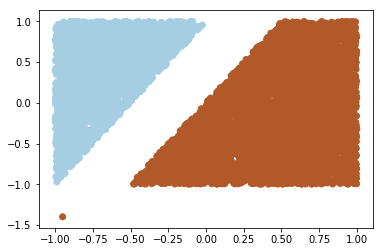

In [22]:
print(X1_train.shape, y1_train.shape)
plt.figure()
plt.scatter(X1_train[:,0], X1_train[:,1], c=y1_train, cmap=plt.cm.Paired)
plt.show()

In [23]:
svm_compare(X1,y1)

Kernel :	 linear Score : 	 1.00
Kernel :	 sigmoid Score : 	 1.00
Kernel :	 rbf Score : 	 1.00
Kernel :	 poly Score : 	 0.99


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
ds1_grid = [
    {'kernel': ['linear'], 'C': C_values,},
]

In [25]:
clf_ds1_train_grid = grid_search_CV_optimal_svm(X1_train,y1_train,ds1_grid)

Grid Search : Best SVM classifier parameters:
 {'C': 10, 'kernel': 'linear'}
Grid Search :Best CV score : 1.0


In [26]:
def plot_classifier2(clf, X_train, y_train, title = ''):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.title(title)
    print(str(clf.best_params_))
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,  linewidth=1, facecolors='none', edgecolors='k')
    print('Total Support Vectors {0}'.format(len(clf.best_estimator_.support_vectors_)))
    print('Training Samples {0}'.format(len(X1_train)))
    print(clf.best_estimator_.support_vectors_)
    expected_eout = get_eout(len(clf.best_estimator_.support_vectors_),len(X1_train))
    print('E-out {0}'.format(expected_eout))
    plt.show()

{'C': 10, 'kernel': 'linear'}
Total Support Vectors 6
Training Samples 8000
[[-0.93348183 -0.86618848]
 [-0.83928299 -0.67750844]
 [-0.13321589  0.73438384]
 [-0.13394844 -0.2682658 ]
 [-0.95       -1.4       ]
 [ 0.26596053  0.53110191]]
E-out 0.0007500937617202151


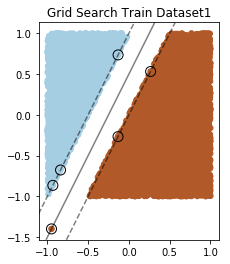

In [27]:
plot_classifier2(clf_ds1_train_grid,X1_train,y1_train,'Grid Search Train Dataset1')

{'C': 10, 'kernel': 'linear'}
Total Support Vectors 6
Training Samples 8000
[[-0.93348183 -0.86618848]
 [-0.83928299 -0.67750844]
 [-0.13321589  0.73438384]
 [-0.13394844 -0.2682658 ]
 [-0.95       -1.4       ]
 [ 0.26596053  0.53110191]]
E-out 0.0007500937617202151


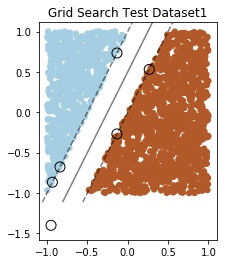

In [28]:
plot_classifier2(clf_ds1_train_grid,X1_test,y1_test,'Grid Search Test Dataset1')

# Dataset 2

(8000, 2) (8000,)


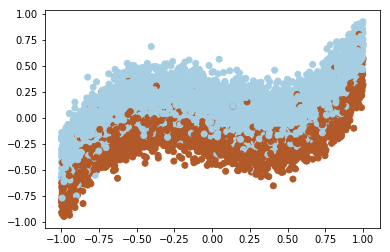

In [29]:
print(X2_train.shape, y2_train.shape)
plt.figure()
plt.scatter(X2_train[:,0], X2_train[:,1], c=y2_train, cmap=plt.cm.Paired)
plt.show()

In [30]:
svm_compare(X2,y2)

Kernel :	 linear Score : 	 0.77


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 sigmoid Score : 	 0.65


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 rbf Score : 	 0.86


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 poly Score : 	 0.72


In [31]:
ds23_grid = [
    {'kernel': ['rbf'],'C': C_values, 'gamma': gamma_vals, }
]

In [32]:
clf_ds2_train_grid = grid_search_CV_optimal_svm(X2_train,y2_train,ds23_grid)

Grid Search : Best SVM classifier parameters:
 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Grid Search :Best CV score : 0.8645


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Total Support Vectors 2899
Training Samples 8000
[[-0.90519703 -0.36406262]
 [-0.19145994 -0.02928284]
 [-0.78354288 -0.25264186]
 ...
 [-0.38338885 -0.04712923]
 [-0.98604925 -0.68691022]
 [-0.74547482 -0.11228036]]
E-out 0.3624203025378172


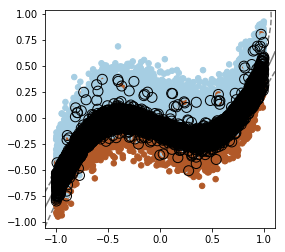

In [33]:
plot_classifier2(clf_ds2_train_grid,X2_train,y2_train)

In [34]:
clf_ds2_test_grid = grid_search_CV_optimal_svm(X2_test,y2_test,ds23_grid)

Grid Search : Best SVM classifier parameters:
 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Grid Search :Best CV score : 0.867


{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Total Support Vectors 696
Training Samples 8000
[[ 0.75304688  0.08108139]
 [-0.39361869 -0.05108413]
 [-0.74628016 -0.2141287 ]
 ...
 [-0.47257724  0.02257728]
 [-0.17693336 -0.06902673]
 [-0.65936344 -0.22538064]]
E-out 0.08701087635954494


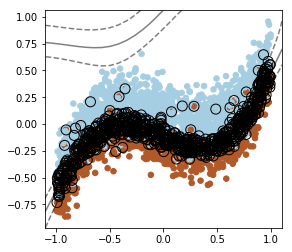

In [35]:
plot_classifier2(clf_ds2_test_grid,X2_test,y2_test)

# Dataset 3

(8000, 2) (8000,)


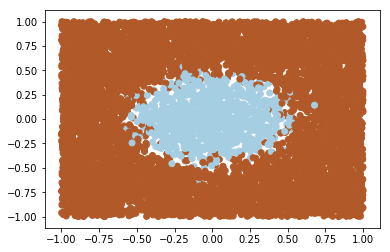

In [36]:
print(X3_train.shape, y3_train.shape)
plt.figure()
plt.scatter(X3_train[:,0], X3_train[:,1], c=y3_train, cmap=plt.cm.Paired)
plt.show()

In [37]:
svm_compare(X3,y3)

Kernel :	 linear Score : 	 0.88


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 sigmoid Score : 	 0.81
Kernel :	 rbf Score : 	 0.99


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Kernel :	 poly Score : 	 0.88


In [38]:
clf_ds3_train_grid = grid_search_CV_optimal_svm(X3_train,y3_train,ds23_grid)

Grid Search : Best SVM classifier parameters:
 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Grid Search :Best CV score : 0.987875


{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Total Support Vectors 935
Training Samples 8000
[[-0.14736076  0.3702305 ]
 [-0.20227203 -0.36223781]
 [ 0.06436483  0.31615998]
 ...
 [-0.47313582 -0.28503441]
 [-0.52474559  0.3308358 ]
 [-0.11965778  0.52314493]]
E-out 0.11688961120140018


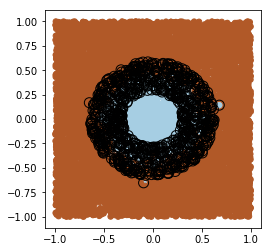

In [39]:
plot_classifier2(clf_ds3_train_grid,X3_train,y3_train)

In [40]:
clf_ds3_test_grid = grid_search_CV_optimal_svm(X3_test,y3_test,ds23_grid)

Grid Search : Best SVM classifier parameters:
 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Grid Search :Best CV score : 0.9885


{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Total Support Vectors 180
Training Samples 8000
[[ 0.03792597 -0.37718649]
 [-0.38175272 -0.04937899]
 [ 0.09186315 -0.3357181 ]
 [ 0.36335469 -0.2051127 ]
 [ 0.33271299 -0.15445458]
 [ 0.1897281   0.31184945]
 [ 0.42567936  0.19370804]
 [ 0.16785146  0.37743853]
 [-0.25167571  0.24372918]
 [-0.43409237 -0.03825495]
 [-0.04704305  0.32016246]
 [-0.04022188  0.31503812]
 [-0.30942336 -0.17795087]
 [-0.06689438 -0.46938714]
 [ 0.16167535 -0.32416269]
 [ 0.30001938  0.29559316]
 [ 0.26024579  0.28149121]
 [ 0.37423132 -0.22113348]
 [ 0.32051187 -0.52126589]
 [-0.0602173  -0.32628554]
 [ 0.13181793 -0.31844287]
 [ 0.38763663  0.29082098]
 [ 0.16035934  0.28317923]
 [ 0.00992627  0.36580026]
 [ 0.04110525  0.38869467]
 [-0.18656451  0.30475795]
 [ 0.25115701  0.3175002 ]
 [-0.31191475 -0.19404767]
 [-0.40452353  0.18089837]
 [ 0.31350937 -0.26972414]
 [-0.29095095 -0.19933403]
 [-0.09571832  0.35584019]
 [ 0.12700807 -0.40731799]
 [ 0.36761843 -0.

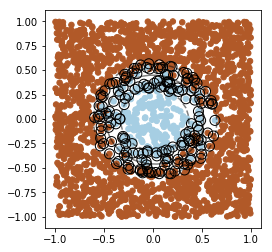

In [41]:
plot_classifier2(clf_ds3_test_grid,X3_test,y3_test)

# Task 5 Comment

dataset1 is linearly seperable so the best params where:
    Grid Search : Best SVM classifier parameters:
    {'C': 10, 'kernel': 'linear'}
    Grid Search :Best CV score : 1.0
In contrast dataset2, dataset3 are not linearly seperably so the choice of kernal is different as in C also:
dataset2 :   Grid Search : Best SVM classifier parameters:
             {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
             Grid Search :Best CV score : 0.8645
dataset3 :   Grid Search : Best SVM classifier parameters:
             {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
             Grid Search :Best CV score : 0.987875

# Example Dataset

# Linear

In [42]:
X4 = X2[40:55]
print('x4 {0}'.format(X4.shape))
y4 = y3[60:75]
print('y4 {0}'.format(y4.shape))

x4 (15, 2)
y4 (15,)


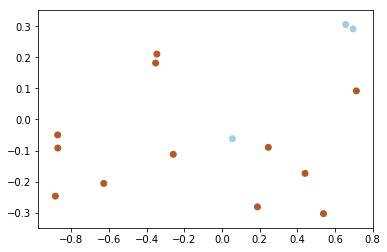

In [57]:
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap=plt.cm.Paired)

In [58]:
svm_compare(X4,y4)

Kernel :	 linear Score : 	 1.00
Kernel :	 sigmoid Score : 	 1.00
Kernel :	 rbf Score : 	 1.00
Kernel :	 poly Score : 	 1.00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [61]:
example_ds_grid = grid_search_CV_optimal_svm(X4,y4,ds23_grid)

Grid Search : Best SVM classifier parameters:
 {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
Grid Search :Best CV score : 0.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
Total Support Vectors 6
Training Samples 8000
[[ 0.69550373  0.2922365 ]
 [ 0.05519511 -0.06203245]
 [ 0.65652575  0.30619456]
 [ 0.44076216 -0.17375055]
 [ 0.24554636 -0.08977554]
 [ 0.71309497  0.0921555 ]]
E-out 0.0007500937617202151


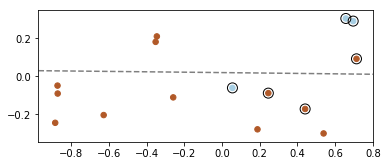

In [62]:
plot_classifier2(example_ds_grid,X4,y4)

# RBF

In [47]:
rbfkernal = GridSearchCV(svm.SVC(), {'kernel': ['rbf'], 'C': [1]}, scoring='accuracy',cv=2, n_jobs=-1)
rbfkernal.fit(X1_train, y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

{'C': 1, 'kernel': 'rbf'}
Total Support Vectors 38
Training Samples 8000
[[-0.98792723 -0.97230995]
 [-0.05816835  0.93247212]
 [-0.93348183 -0.86618848]
 [-0.83928299 -0.67750844]
 [-0.94427626 -0.87298394]
 [-0.04231294  0.93290025]
 [-0.85799737 -0.70727426]
 [-0.02413072  0.95493771]
 [-0.05606225  0.89609919]
 [-0.13321589  0.73438384]
 [-0.97702218 -0.9291043 ]
 [-0.11395808  0.77610907]
 [-0.04511026  0.9271628 ]
 [-0.06027938  0.9125094 ]
 [-0.0402588   0.92781312]
 [-0.88675066 -0.76282511]
 [-0.9784434  -0.92813265]
 [-0.9604324  -0.90889174]
 [-0.78974925 -0.57527146]
 [ 0.49142383  0.97375185]
 [ 0.16721063  0.33260922]
 [-0.42962017 -0.87261554]
 [-0.46306109 -0.96653621]
 [-0.42706451 -0.87702154]
 [ 0.34586609  0.6888361 ]
 [-0.44428153 -0.92435106]
 [-0.95       -1.4       ]
 [-0.47937047 -0.99718802]
 [-0.4707439  -0.98631492]
 [ 0.33605953  0.67044617]
 [ 0.26596053  0.53110191]
 [ 0.43052029  0.85518774]
 [ 0.31305328  0.62450954]
 [ 0.33622074  0.66386008]
 [-0.4727

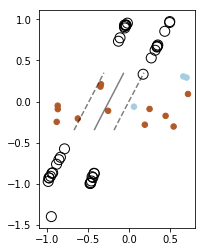

In [48]:
plot_classifier2(rbfkernal,X4,y4)